In [31]:
import pandas as pd
relevant_df=pd.read_csv('../data/relevant_topics_df.csv')

In [32]:
relevant_df.head()

,Unnamed: 0.1,Unnamed: 0,article_nr,sentence,wordcount,section_name,web_publication_date,headline,web_title,production_office,publication,topic,Topic,Count,Name,sentiment,sentiment_score,sentiment_score_1,year
0,256994,26,0,However much sceptics and critics might ridicu...,855,Opinion,2022-08-20T13:00:42Z,AI-generated art illustrates another problem w...,AI-generated art illustrates another problem w...,UK,The Observer,42,42,755,42_machines_machine_humans_human,POSITIVE,0.997797,0.997797,2022
1,256995,408,6,But for anyone who thinks that living in a wor...,755,Opinion,2021-12-25T15:00:05Z,Worried about super-intelligent machines? They...,Worried about super-intelligent machines? They...,UK,The Observer,42,42,755,42_machines_machine_humans_human,POSITIVE,0.969094,0.969094,2021
2,256996,538,8,There is a deeper split about whether machines...,715,Technology,2022-06-13T11:43:37Z,How does Google’s AI chatbot work – and could ...,How does Google’s AI chatbot work – and could ...,UK,theguardian.com,42,42,755,42_machines_machine_humans_human,NEGATIVE,0.996847,-0.996847,2022
3,256997,609,10,"The second sense, from which the first borrows...",1002,Books,2021-11-29T07:00:51Z,The big idea: Should we worry about artificial...,The big idea: Should we worry about artificial...,UK,The Guardian,42,42,755,42_machines_machine_humans_human,POSITIVE,0.997163,0.997163,2021
4,256998,656,11,"Well, that the machine was displaying signs of...",804,Opinion,2022-06-18T13:00:21Z,Why is Google so alarmed by the prospect of a ...,Why is Google so alarmed by the prospect of a ...,UK,The Observer,42,42,755,42_machines_machine_humans_human,NEGATIVE,0.706173,-0.706173,2022


In [33]:
# filter for section_name 'Technology' and count number of articles per topic
section_df = relevant_df.groupby(['section_name','Name'])['article_nr'].count()

section_df.head()

section_name    Name                                                
About           22_turing_alan_alan turing_test                         20
                24_women_female_engineering_gender                       2
                3_ai_intelligence_artificial_artificial intelligence     1
                40_language_word_words_translation                      16
Art and design  13_data_privacy_big data_protection                      5
Name: article_nr, dtype: int64

In [34]:
sec_per_df = relevant_df.groupby(['section_name','topic','Name'])['article_nr'].count().groupby(level=0).apply(lambda x: 100 * x / x.sum()).reset_index()

/var/folders/d0/5yt19bqs6bv_03rdznqvkyym0000gn/T/ipykernel_8184/2172260521.py:1: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



In [35]:
sec_per_df.head(10)

,section_name,topic,Name,article_nr
0,About,3,3_ai_intelligence_artificial_artificial intell...,2.564103
1,About,22,22_turing_alan_alan turing_test,51.282051
2,About,24,24_women_female_engineering_gender,5.128205
3,About,40,40_language_word_words_translation,41.025641
4,Art and design,3,3_ai_intelligence_artificial_artificial intell...,22.807018
5,Art and design,13,13_data_privacy_big data_protection,4.385965
6,Art and design,18,18_algorithms_learning_algorithm_machine learning,7.017544
7,Art and design,22,22_turing_alan_alan turing_test,14.035088
8,Art and design,24,24_women_female_engineering_gender,5.263158
9,Art and design,25,25_automation_jobs_davos_revolution,0.877193


In [36]:
# subset to section_name 'Technology', Opinion, Science
sec_per_df = sec_per_df[sec_per_df['section_name'].isin(['Technology', 'Opinion', 'Science','Film', 'Games','Books'])]



In [37]:
#type of the column article_nr
type(sec_per_df['article_nr'])

# convert article_nr to float
sec_per_df['article_nr'] = sec_per_df['article_nr'].astype(float)

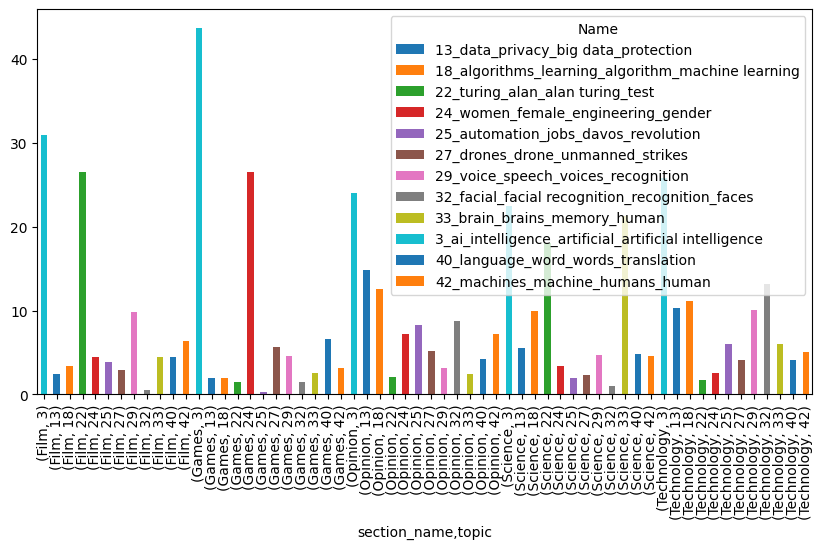

In [25]:
# make a grouped bar plot of the percentages of topics per section_name
sec_per_df.groupby(['section_name', 'topic','Name']).article_nr.sum().unstack().plot(kind='bar', stacked=True, figsize=(10, 5))
sec_per_df = sec_per_df.sort_values(by='topic', ascending=False)

#number of articles per topic per section
#sec_per_df.unstack().plot(kind='bar', stacked=True, figsize=(15,10), title='Percentage of Topic per Section')

In [26]:
import plotly.express as px

In [38]:
# rename the column 'article_nr' to 'percentage'
sec_per_df.rename(columns={'article_nr': 'percentage'}, inplace=True)
sec_per_df.rename(columns={'Name': 'Topics'}, inplace=True)

sec_per_df.head()



,section_name,topic,Topics,percentage
27,Books,3,3_ai_intelligence_artificial_artificial intell...,35.587189
28,Books,13,13_data_privacy_big data_protection,7.295374
29,Books,18,18_algorithms_learning_algorithm_machine learning,9.074733
30,Books,22,22_turing_alan_alan turing_test,13.167260
31,Books,24,24_women_female_engineering_gender,4.092527


In [42]:
#Horizontal bar chart
fig_section = px.bar(sec_per_df, y="Topics", x="percentage", facet_col="section_name", facet_col_wrap=3,orientation='h',  title="Percentage of Topics per Section")

# adjust the size of the plot

for a in fig_section.layout.annotations:
    a.text = a.text.split("=")[1]


fig_section.show()


In [45]:
fig_section.update_layout(height=600, width=900)

In [57]:
import kaleido

In [46]:
fig_section.write_image("../outputs/fig_section.png")

In [ ]:
# sentiment per section
sec_per_df = relevant_df.groupby(['section_name','topic','Name'])['article_nr'].count().groupby(level=0).apply(lambda x: 100 * x / x.sum()).reset_index()

In [47]:
# grouping by topic and publication office and getting average sentiment score
sentiments_section=relevant_df.groupby(['section_name','topic','Name'])["sentiment_score_1"].mean().reset_index()


In [49]:
# subset to section_name 'Technology', Opinion, Science, Film, Books, Games
sentiments_section = sentiments_section[sentiments_section['section_name'].isin(['Technology', 'Opinion', 'Science','Film', 'Games','Books'])]


In [52]:
#type of the column article_nr
type(sentiments_section['sentiment_score_1'])

# convert article_nr to float
sentiments_section['sentiment_score_1'] = sentiments_section['sentiment_score_1'].astype(float)

In [55]:
# rename the column 'article_nr' to 'percentage'
sentiments_section.rename(columns={'sentiment_score_1': 'Sentiment Score'}, inplace=True)
sentiments_section.rename(columns={'Name': 'Topics'}, inplace=True)

sentiments_section.head()

,section_name,topic,Topics,Sentiment Score
27,Books,3,3_ai_intelligence_artificial_artificial intell...,0.152602
28,Books,13,13_data_privacy_big data_protection,0.264090
29,Books,18,18_algorithms_learning_algorithm_machine learning,-0.446167
30,Books,22,22_turing_alan_alan turing_test,0.592437
31,Books,24,24_women_female_engineering_gender,0.125154


In [56]:
#Horizontal bar chart
fig_sent_sec = px.bar(sentiments_section, y="Topics", x="Sentiment Score", facet_col="section_name", facet_col_wrap=3,orientation='h',  title="Sentiment per Topic per Section")

# adjust the size of the plot

for a in fig_sent_sec.layout.annotations:
    a.text = a.text.split("=")[1]

fig_sent_sec.update_layout(height=600, width=900)

fig_sent_sec.show()

In [58]:
fig_sent_sec.write_image("../outputs/sentiment_section.png")